In [1]:
import pandas as pd
import numpy as np

# Define the number of samples in the dataset
num_samples = 1000

# Generate random EEG data for each electrode (TP9, AF7, AF8, TP10)
tp9_data = np.random.rand(num_samples)
af7_data = np.random.rand(num_samples)
af8_data = np.random.rand(num_samples)
tp10_data = np.random.rand(num_samples)

# Generate random labels ('left' or 'right')
labels = np.random.choice(['left', 'right'], num_samples)

# Create a dictionary to store the data
data_dict = {
    'TP9': tp9_data,
    'AF7': af7_data,
    'AF8': af8_data,
    'TP10': tp10_data,
    'Label': labels
}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Save the dataset to a CSV file
df.to_csv('motor_imagery_dataset.csv', index=False)


In [4]:
pd.set_option('display.max_columns', None)
df

,TP9,AF7,AF8,TP10,Label
0,0.172079,0.670730,0.811439,0.465516,right
1,0.545595,0.856194,0.782344,0.481803,right
2,0.083859,0.284839,0.035155,0.756509,left
3,0.022341,0.958276,0.262384,0.710359,right
4,0.364826,0.727321,0.646546,0.344075,left
...,...,...,...,...,...
995,0.481929,0.360046,0.189712,0.876443,right
996,0.023827,0.896545,0.340649,0.238140,left
997,0.755682,0.991651,0.804055,0.173693,left
998,0.208761,0.916677,0.129509,0.510763,right


In [5]:
import tensorflow
from  tensorflow import keras
print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.7.0
Keras version: 2.7.0


In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [11]:
# Separate features (X) and labels (y)
X = df[['TP9', 'AF7', 'AF8', 'TP10']].values
y = df['Label'].values
#X, y = df[features].values, df[label].values

for n in range(0,4):
    print("Record:", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Record: 1 
  Features: [0.17207871131997254, 0.6707299953536258, 0.8114394861267274, 0.4655162399542787] 
  Label: right
Record: 2 
  Features: [0.5455949131405485, 0.8561939407749062, 0.7823444563642015, 0.48180269992182156] 
  Label: right
Record: 3 
  Features: [0.08385902162876757, 0.2848385020430795, 0.035155393103590726, 0.7565087693218343] 
  Label: left
Record: 4 
  Features: [0.022341499556209343, 0.9582762755629549, 0.2623842500254969, 0.710359155211585] 
  Label: right


In [12]:
# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Get the mapping of numerical labels to original class names
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# Print the label mapping
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'left': 0, 'right': 1}


In [13]:
# One-hot encode the integer labels
y_onehot = to_categorical(y_encoded)

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 800
Test cases: 200


In [20]:
# Reshape the input data for CNN (add an additional dimension for 1D convolution)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(4, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output neurons for 'left' and 'right'

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 9s 27ms/step - loss: 0.6965 - accuracy: 0.4891 - val_loss: 0.7004 - val_accuracy: 0.4750
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5328 - val_loss: 0.6998 - val_accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5328 - val_loss: 0.7000 - val_accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5328 - val_loss: 0.7009 - val_accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5328 - val_loss: 0.7016 - val_accuracy: 0.4750
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5328 - val_loss: 0.7019 - val_accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5328 - val_loss: 0.7006 - val_accuracy: 0.4750
Epoch 8/10
20/20 [=

In [30]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4850
Test Loss: 0.6955, Test Accuracy: 0.4850


In [33]:
# Plot Test Accuracy vs. Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs. Epochs')
plt.legend()
plt.show()

NameError: name 'history' is not defined

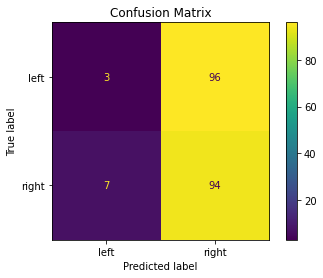

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis', values_format='d')

# Save the confusion matrix plot
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

In [38]:

# Make predictions on new data (assuming you have new EEG data in a variable `new_data`)
new_data = np.array([[0.1, 0.2, 0.3, 0.4]])  # Example new data, replace with actual data
new_data = new_data.reshape(new_data.shape[0], new_data.shape[1], 1)
predicted_probabilities = model.predict(new_data)
predicted_label = label_encoder.inverse_transform(np.argmax(predicted_probabilities, axis=1))
print(f'Predicted label: {predicted_label[0]}')

Predicted label: right


ROC AUC Score for Class "left": 0.48
ROC AUC Score for Class "right": 0.48
Average ROC AUC Score: 0.48


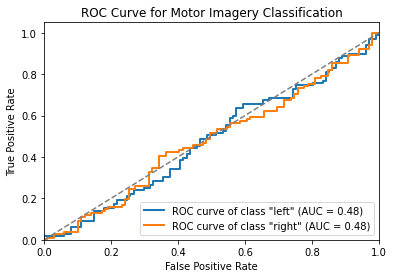

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC AUC score for each class separately
roc_auc_scores = roc_auc_score(y_test, y_pred, multi_class='ovr', average=None)

# Calculate average ROC AUC score
average_auc = np.mean(roc_auc_scores)

# Print ROC AUC score for each class
for i, class_label in enumerate(label_encoder.classes_):
    print(f'ROC AUC Score for Class "{class_label}": {roc_auc_scores[i]:.2f}')

print(f'Average ROC AUC Score: {average_auc:.2f}')

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(label_encoder.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
for i, class_label in enumerate(label_encoder.classes_):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class "{class_label}" (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Motor Imagery Classification')
plt.legend(loc='lower right')
plt.savefig("roc_curve.png")
plt.show()

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the hyperparameter search space
param_grid = {
    'filters': [16, 32, 64],
    'kernel_size': [3, 5],
    'pool_size': [2, 3],
    'dense_units': [64, 128, 256],
}

# Create the CNN model function
def create_model(filters, kernel_size, pool_size, dense_units):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(4, 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2)
random_search_result = random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_filters = random_search_result.best_params_['filters']
best_kernel_size = random_search_result.best_params_['kernel_size']
best_pool_size = random_search_result.best_params_['pool_size']
best_dense_units = random_search_result.best_params_['dense_units']


<ipython-input-45-5e299e293068>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END dense_units=256, filters=64, kernel_size=3, pool_size=2; total time=   0.8s
[CV] END dense_units=256, filters=64, kernel_size=3, pool_size=2; total time=   0.6s
[CV] END dense_units=256, filters=64, kernel_size=3, pool_size=2; total time=   0.9s
[CV] END dense_units=128, filters=16, kernel_size=3, pool_size=2; total time=   0.7s
[CV] END dense_units=128, filters=16, kernel_size=3, pool_size=2; total time=   0.6s
[CV] END dense_units=128, filters=16, kernel_size=3, pool_size=2; total time=   0.5s
[CV] END dense_units=256, filters=32, kernel_size=5, pool_size=2; total time=   0.0s
[CV] END dense_units=256, filters=32, kernel_size=5, pool_size=2; total time=   0.0s
[CV] END dense_units=256, filters=32, kernel_size=5, pool_size=2; total time=   0.0s
[CV] END dense_units=64, filters=32, kernel_size=5, pool_size=3; total time=   0.0s


C:\Users\21694\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\21694\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21694\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\21694\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-45-5e299e293068>", line 15, in create_model
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(4, 1)))
  File "C:\Users\21694\anaconda3\lib\site-packages\tensorflow\python\traini

[CV] END dense_units=64, filters=32, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=64, filters=32, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=128, filters=32, kernel_size=3, pool_size=3; total time=   0.0s
[CV] END dense_units=128, filters=32, kernel_size=3, pool_size=3; total time=   0.0s
[CV] END dense_units=128, filters=32, kernel_size=3, pool_size=3; total time=   0.0s
[CV] END dense_units=128, filters=64, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=128, filters=64, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=128, filters=64, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=64, filters=64, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=64, filters=64, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=64, filters=64, kernel_size=5, pool_size=3; total time=   0.0s
[CV] END dense_units=64, filters=16, kernel_size=5, pool_size=2; total

C:\Users\21694\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\21694\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\21694\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\21694\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-45-5e299e293068>", line 15, in create_model
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(4, 1)))
  File "C:\Users\21694\anaconda3\lib\site-packages\tensorflow\python\traini

[CV] END dense_units=64, filters=16, kernel_size=5, pool_size=2; total time=   0.0s
[CV] END dense_units=64, filters=16, kernel_size=5, pool_size=2; total time=   0.0s
[CV] END dense_units=256, filters=32, kernel_size=3, pool_size=2; total time=   0.6s
[CV] END dense_units=256, filters=32, kernel_size=3, pool_size=2; total time=   0.6s
[CV] END dense_units=256, filters=32, kernel_size=3, pool_size=2; total time=   0.6s
[CV] END dense_units=64, filters=16, kernel_size=3, pool_size=2; total time=   0.7s
[CV] END dense_units=64, filters=16, kernel_size=3, pool_size=2; total time=   0.7s
[CV] END dense_units=64, filters=16, kernel_size=3, pool_size=2; total time=   0.7s


C:\Users\21694\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.50997813 0.52994846        nan        nan        nan        nan
        nan        nan 0.50994996 0.50373124]
  warnings.warn(


In [47]:
# Modify the model architecture with the best hyperparameters
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(4, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_35. Consider increasing the input size. Received input shape [None, 1, 64] which would produce output shape with a zero or negative value in a dimension.

In [49]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.001
lr_decay = 0.95
lr_decay_steps = 1000
learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps=lr_decay_steps, decay_rate=lr_decay)

# Compile the model with the adjusted learning rate
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate_schedule),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Fit the generator on the training data
datagen.fit(X_train)

# Train the model with augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, verbose=1)


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (800, 4, 1)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Fit the generator on the training data
datagen.fit(X_train)

# Evaluate the model with augmented data
test_loss, test_accuracy = model.evaluate(datagen.flow(X_test, y_test, batch_size=32), verbose=1)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (800, 4, 1)

In [53]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/10


ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 2) and (32, 1, 64) are incompatible


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Fit the generator on the training data
datagen.fit(X_train)

# Evaluate the model with augmented data
test_loss, test_accuracy = model.evaluate(datagen.flow(X_test, y_test, batch_size=32, shuffle=False), verbose=1)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (800, 4, 1)

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Load the dataset
df = pd.read_csv('motor_imagery_dataset.csv')

# Separate features (X) and labels (y)
X = df[['TP9', 'AF7', 'AF8', 'TP10']].values
y = df['Label'].values

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_onehot = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define a custom data augmentation function
def augment_data(X, sigma=0.01):
    noise = np.random.normal(0, sigma, X.shape)
    augmented_data = X + noise
    return augmented_data

# Perform data augmentation on the training data
X_train_augmented = augment_data(X_train)

# Create the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(4, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# Compile the model with the adjusted learning rate
initial_learning_rate = 0.001
lr_decay = 0.95
lr_decay_steps = 1000
learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps=lr_decay_steps, decay_rate=lr_decay)
model.compile(optimizer=Adam(learning_rate=learning_rate_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
model.fit(X_train_augmented, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Rest of the code remains the same...


Epoch 1/20
25/25 [==============================] - 1s 11ms/step - loss: 0.6968 - accuracy: 0.5225 - val_loss: 0.6933 - val_accuracy: 0.5050
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4925 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5288 - val_loss: 0.6949 - val_accuracy: 0.5050
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5288 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5288 - val_loss: 0.6930 - val_accuracy: 0.5150
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5337 - val_loss: 0.6935 - val_accuracy: 0.4850
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5625 - val_loss: 0.6939 - val_accuracy: 0.4950
Epoch 8/20
25/25 [=

In [56]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

# Make predictions on new data (assuming you have new EEG data in a variable `new_data`)
new_data = np.array([[0.1, 0.2, 0.3, 0.4]])  # Example new data, replace with actual data
new_data = new_data.reshape(new_data.shape[0], new_data.shape[1], 1)
predicted_probabilities = model.predict(new_data)
predicted_label = label_encoder.inverse_transform(np.argmax(predicted_probabilities, axis=1))
print(f'Predicted label: {predicted_label[0]}')

7/7 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5100
Test accuracy: 0.51
Predicted label: right


In [60]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.001
lr_decay = 0.95
lr_decay_steps = 1000
learning_rate_schedule = ExponentialDecay(initial_learning_rate, decay_steps=lr_decay_steps, decay_rate=lr_decay)

# Compile the model with the adjusted learning rate
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate_schedule),
              loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
# Train the model with augmented data
model.fit(X_train_augmented, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6687 - accuracy: 0.5813 - val_loss: 0.7164 - val_accuracy: 0.5250
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5875 - val_loss: 0.7119 - val_accuracy: 0.5350
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5975 - val_loss: 0.7109 - val_accuracy: 0.5250
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5987 - val_loss: 0.7125 - val_accuracy: 0.5450
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5987 - val_loss: 0.7168 - val_accuracy: 0.5550
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5900 - val_loss: 0.7140 - val_accuracy: 0.5550
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6037 - val_loss: 0.7149 - val_accuracy: 0.5600
Epoch 8/20
25/25 [==

In [59]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weights_dict, verbose=1)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5813
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5825
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5875
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5788
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.5850
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5863
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5612
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5975
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5875
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.5150
Test accuracy: 0.51


In [85]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
# Function to load and preprocess a single dataset
def load_and_preprocess_dataset(file_path):
    df = pd.read_csv(file_path)
    label_encoder = LabelEncoder()
    df['Label'] = label_encoder.fit_transform(df['Label'])
    X = df.drop(columns=['Label'])
    y = df['Label']
    return X, y

# Function to load and preprocess all datasets from a folder
def load_and_preprocess_datasets(folder_path):
    X_list, y_list = [], []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            X, y = load_and_preprocess_dataset(file_path)
            X_list.append(X)
            y_list.append(y)
    X_combined = pd.concat(X_list, ignore_index=True)
    y_combined = pd.concat(y_list, ignore_index=True)
    return X_combined, y_combined

# Function to create and compile the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to train the model
def train_model(X_train, y_train, X_test, y_test, input_shape, num_classes, epochs=10, batch_size=32):
    model = create_cnn_model(input_shape, num_classes)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
    return accuracy, roc_auc


# Main function to classify multiple datasets at once
def main():
    folder_path = 'datasets'  # Replace with the path to your folder containing CSV datasets
    num_classes = 2
    epochs = 10
    batch_size = 32
    
    # Load and preprocess datasets from the folder
    X_combined, y_combined = load_and_preprocess_datasets(folder_path)
    X_combined = X_combined.fillna(X_combined.mean())

  # Check if the number of samples in X_combined and y_combined is consistent
    if len(X_combined) != len(y_combined):
        raise ValueError("Number of samples in X_combined and y_combined is inconsistent.")
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
    
    # Reshape data for CNN input
    X_train = np.expand_dims(X_train.values, axis=2)
    X_test = np.expand_dims(X_test.values, axis=2)
    
    # Create and train the model
    input_shape = (X_train.shape[1], 1)
    num_classes = len(np.unique(y_combined))
    model = train_model(X_train, y_train, X_test, y_test, input_shape, num_classes, epochs=epochs, batch_size=batch_size)
    
    # Evaluate the model
    accuracy, roc_auc = evaluate_model(model, X_test, y_test)
    print(f'Test Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}')

if __name__ == '__main__':
    main()

Epoch 1/10
3/3 [==============================] - 0s 57ms/step - loss: 1.0567 - accuracy: 0.4588 - val_loss: 1.0292 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 1.0212 - accuracy: 0.4941 - val_loss: 0.9921 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 11ms/step - loss: 0.9871 - accuracy: 0.5176 - val_loss: 0.9571 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 11ms/step - loss: 0.9551 - accuracy: 0.5176 - val_loss: 0.9238 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 11ms/step - loss: 0.9268 - accuracy: 0.5176 - val_loss: 0.8932 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 0.9017 - accuracy: 0.5176 - val_loss: 0.8653 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 11ms/step - loss: 0.8775 - accuracy: 0.5176 - val_loss: 0.8399 - val_accuracy: 0.5000
Epoch 8/10
3/3 [===========

# BCICIV 3

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('csv_files/BCICIV_2a_3.csv')

# Preprocess the data
X = data.drop(columns=['patient', 'time', 'label', 'epoch'])
y = data['label']

# Encode the labels as integers (left: 0, right: 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape)
# Normalize the features
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to be compatible with CNN input
X_train = X_train.reshape(-1, 5, 5, 2)
X_test = X_test.reshape(-1, 5, 5, 2)


(46310, 22)


ValueError: cannot reshape array of size 1018820 into shape (5,5,2)

In [97]:
# The column names for the dataset
columns = ['patient', 'time', 'label', 'epoch', 'EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

# Creating a DataFrame from the data
df = pd.DataFrame(data, columns=columns)

# Reshape the DataFrame using pivot_table
reshaped_df = df.pivot_table(index=['patient', 'time', 'label', 'epoch'], columns='EEG-Fz', values=columns[4:], aggfunc='first').reset_index()

# Drop the first level of column index and set column names
reshaped_df.columns = ['patient', 'time', 'label', 'epoch'] + [f'EEG-{col}' for col in range(len(reshaped_df.columns[4:]))]

# Display the reshaped DataFrame
print(reshaped_df)

ValueError: negative dimensions are not allowed